
Create an RHI plot with reflectivity contour lines from an MDV file

An example which creates an RHI plot of velocity using a RadarDisplay object
and adding Reflectivity contours from the same MDV file.




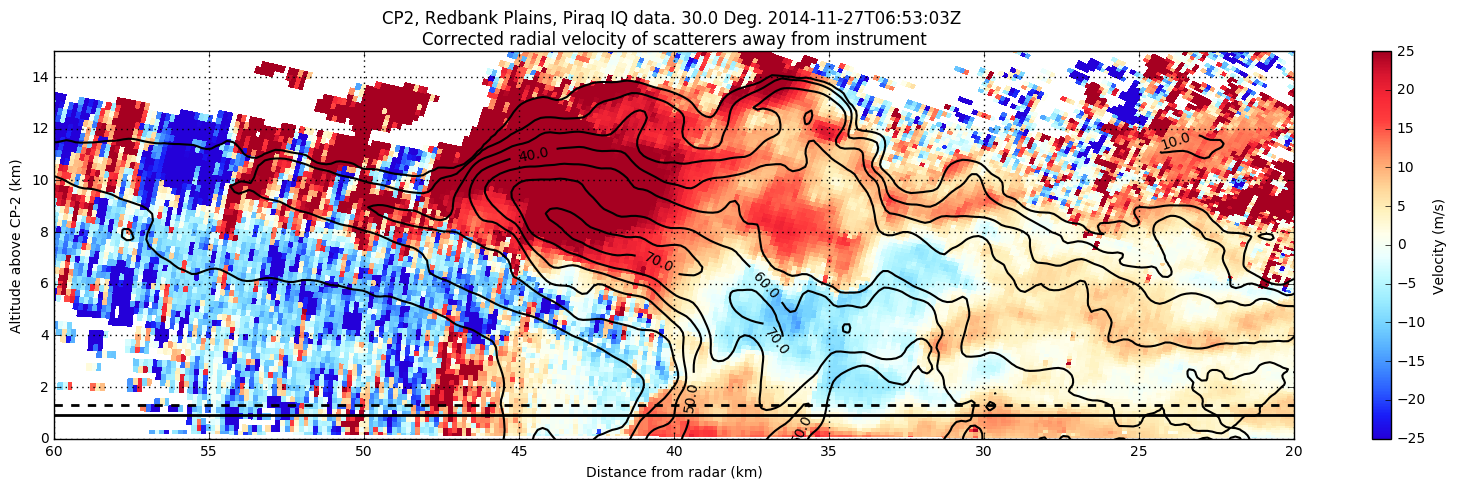

In [120]:
%matplotlib inline

"""
====================================================================
Create an RHI plot with reflectivity contour lines from an MDV file
====================================================================

An example which creates an RHI plot of velocity using a RadarDisplay object
and adding Reflectivity contours from the same MDV file.

"""
print __doc__

# Author: Cory Weber (cweber@anl.gov)
# License: BSD 3 clause
import matplotlib.pyplot as plt
import pyart
import numpy as np
import scipy.ndimage as spyi

root = '/run/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/20141127/'
fn   = '065402.mdv'
ffn  = root + fn

# create the plot using RadarDisplay
sweep = 1
# read file
radar   = pyart.io.read_mdv(ffn)
display = pyart.graph.RadarDisplay(radar)
fig     = plt.figure(figsize=[20, 5])
ax      = fig.add_subplot(111)

# correct for ni
NI       = radar.instrument_parameters['nyquist_velocity']['data'][0]
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', nyquist_vel=NI)
radar.add_field('velocity_corr', corr_vel, False)

# plot velocity
display.plot('velocity_corr', sweep=sweep, vmin=-25, vmax=25.0, fig=fig,
             ax=ax, cmap='pyart_BuDRd18', colorbar_label='Velocity (m/s)')
display.set_limits(xlim=[60, 20], ylim=[0, 15])
# line commented out to show reflectivity
# display.plot('reflectivity', sweep=sweep, vmin=-0, vmax=45.0, fig=fig,ax=ax)

# get data
start = radar.get_start(sweep)
end = radar.get_end(sweep) + 1
data = radar.fields['reflectivity']['data'][start:end]

x = radar.gate_x['data'][start:end] / 1000.0 
y = radar.gate_y['data'][start:end] / 1000.0
z = radar.gate_z['data'][start:end] / 1000.0

# smooth out the lines
data = data[10::,:]
x    = x[10::,:]
y    = y[10::,:]
z    = z[10::,:]

data = spyi.gaussian_filter(data, sigma=1.2,mode='reflect')

# calculate (R)ange
R = np.sqrt(x ** 2 + y ** 2) * np.sign(y) * np.sign(x)

# add contours
# creates steps 35 to 100 by 5
levels = np.arange(10, 100, 10)
# adds coutours to plot
contours = ax.contour(R, z, data, levels, linewidths=1.5, colors='k',
                      linestyles='solid', antialiased=True)

# adds contour labels (fmt= '%r' displays 10.0 vs 10.0000)
plt.clabel(contours, levels, fmt='%r', inline=True, fontsize=10)


# format plot
# add grid (dotted lines, major axis only)
ax.grid(color='k', linestyle=':', linewidth=1, which='major')

# horizontal
ax.axhline(0.9, 0, 1, linestyle='solid', color='k', linewidth=2)
ax.axhline(1.3, 0, 1, linestyle='dashed', color='k', linewidth=2)

ax.set_ylabel('Altitude above CP-2 (km)')

plt.show()